In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

In [9]:
df = pd.read_csv("spotify.csv")
# Display dataset information
print("Dataset Info:")
print(df.info())
print("\nFirst 5 rows:")
display(df.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [10]:
# Select relevant audio features
audio_features = ['danceability', 'energy', 'loudness', 'speechiness', 
                 'acousticness', 'instrumentalness', 'liveness', 
                 'valence', 'tempo', 'duration_ms']

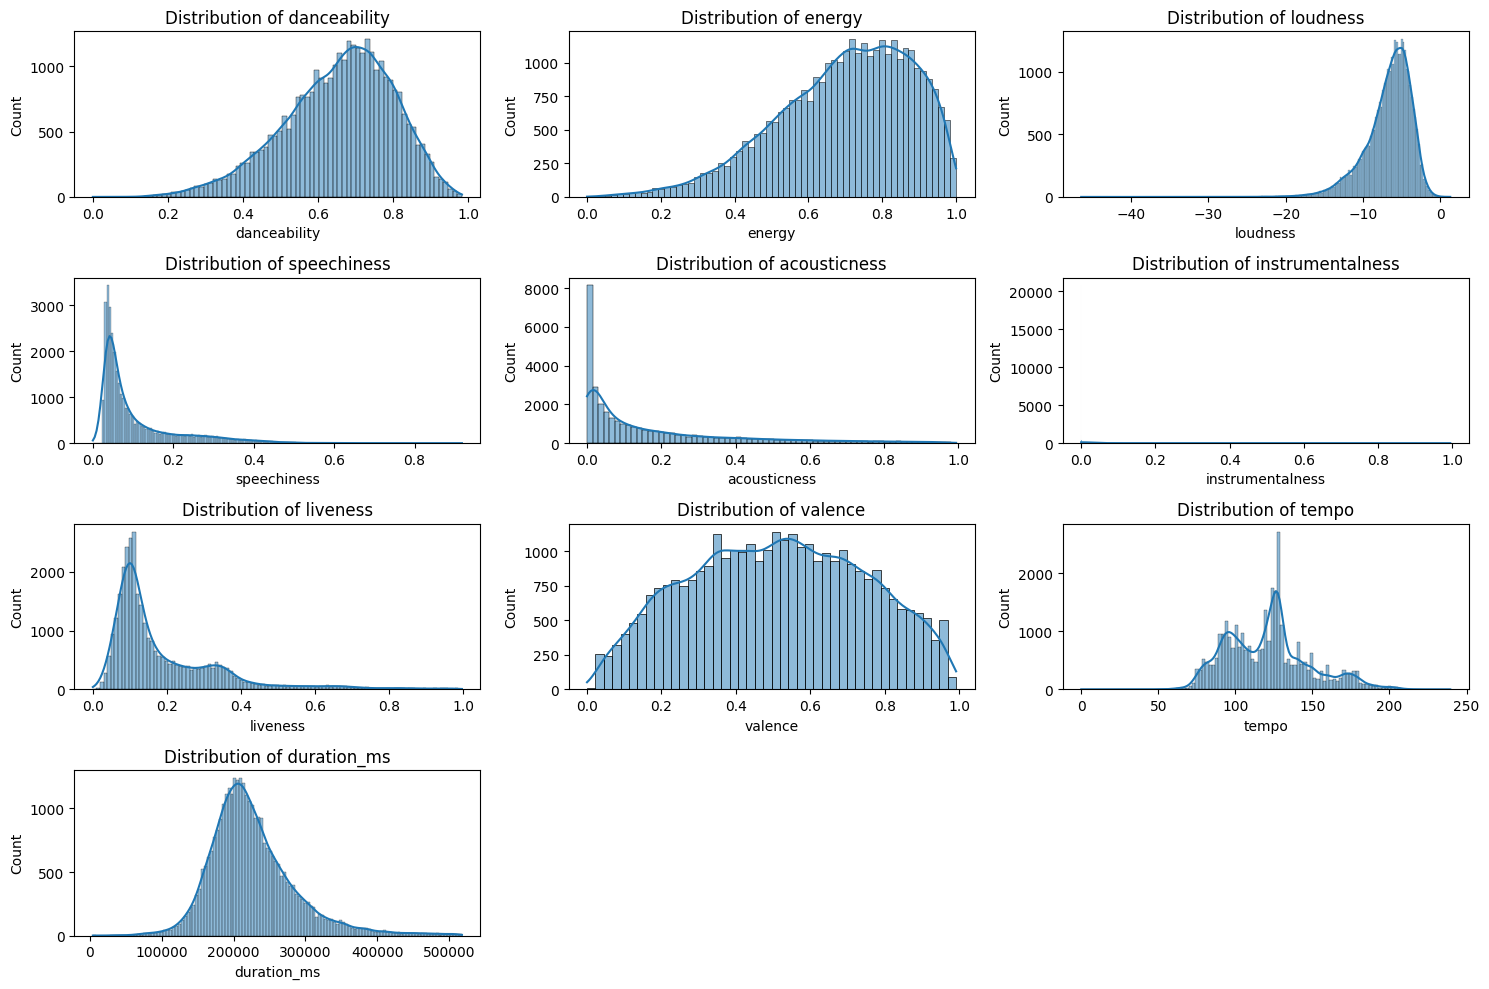

In [11]:
# Create feature dataframe
df_features = df[audio_features]

# Data distribution visualization
plt.figure(figsize=(15, 10))
for i, col in enumerate(audio_features):
    plt.subplot(4, 3, i+1)
    sns.histplot(df_features[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

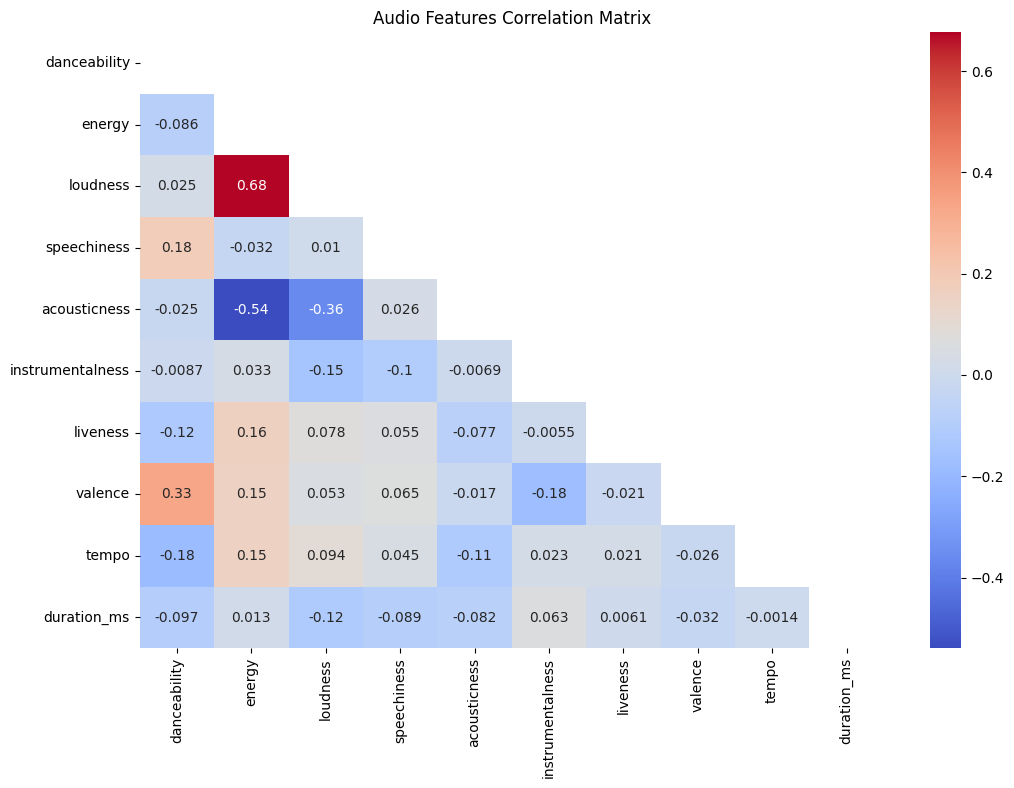

In [12]:
# Correlation matrix
plt.figure(figsize=(12, 8))
corr = df_features.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True, cmap='coolwarm', mask=mask)
plt.title('Audio Features Correlation Matrix')
plt.show()

In [13]:
# Data preprocessing
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_features), columns=audio_features)

In [14]:

# K-distance plot for DBSCAN parameter estimation
def find_optimal_eps(data, k):
    neighbors = NearestNeighbors(n_neighbors=k)
    neighbors_fit = neighbors.fit(data)
    distances, indices = neighbors_fit.kneighbors(data)
    return np.sort(distances[:, k-1])

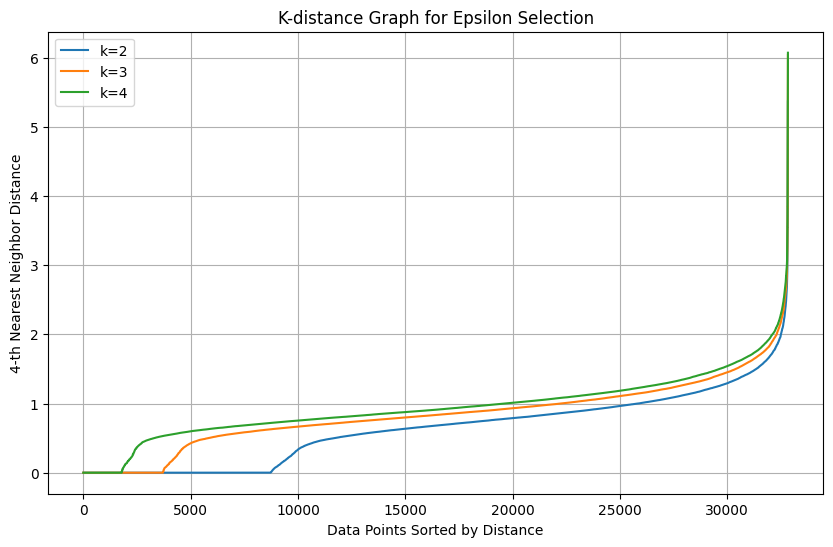

In [16]:
plt.figure(figsize=(10, 6))
k_values = [2, 3, 4]
for k in k_values:
    distances = find_optimal_eps(df_scaled, k)
    plt.plot(distances, label=f'k={k}')
plt.title('K-distance Graph for Epsilon Selection')
plt.xlabel('Data Points Sorted by Distance')
plt.ylabel(f'{k}-th Nearest Neighbor Distance')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# DBSCAN clustering
eps = 0.4  
min_samples = 2
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
clusters = dbscan.fit_predict(df_scaled)

In [18]:
df['cluster'] = clusters

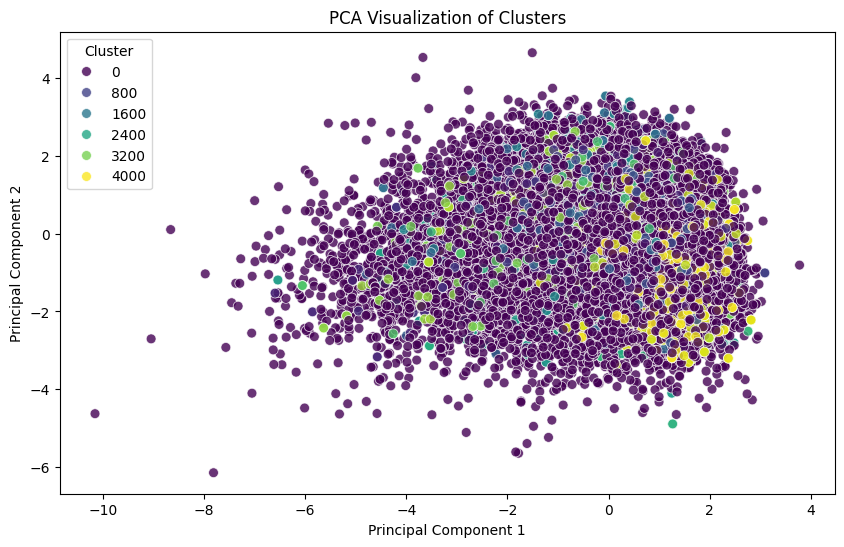

In [19]:
# Cluster visualization using PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1], hue=clusters, 
                palette='viridis', s=50, alpha=0.8)
plt.title('PCA Visualization of Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

In [20]:
# Cluster analysis
cluster_stats = df.groupby('cluster')[audio_features].mean()
print("\nCluster Audio Feature Means:")
display(cluster_stats)


Cluster Audio Feature Means:


,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
cluster,,,,,,,,,,
-1,0.65154,0.691733,-7.004937,0.111111,0.187821,0.101807,0.193283,0.506600,120.964919,226121.500134
0,0.74000,0.910667,-2.725667,0.063300,0.097733,0.000000,0.070400,0.519667,123.043000,192717.000000
1,0.72600,0.815000,-4.969000,0.037300,0.072400,0.004210,0.357000,0.693000,99.972000,162600.000000
2,0.67500,0.931000,-3.432000,0.074200,0.079400,0.000023,0.110000,0.613000,124.008000,176616.000000
3,0.70800,0.912500,-3.730500,0.101500,0.018170,0.008755,0.210500,0.259000,124.001000,170737.000000
...,...,...,...,...,...,...,...,...,...,...
4016,0.69800,0.622000,-5.002000,0.207000,0.003300,0.000000,0.518000,0.512000,128.059000,212048.000000
4017,0.57600,0.693000,-6.113000,0.031200,0.011100,0.656000,0.099100,0.314000,127.986000,292284.000000
4018,0.57450,0.888500,-2.802500,0.040200,0.116500,0.000063,0.333000,0.229500,127.911000,200156.000000


In [21]:
# Silhouette score calculation (excluding noise points)
valid_clusters = clusters != -1
silhouette_avg = silhouette_score(df_scaled[valid_clusters], clusters[valid_clusters])
print(f"Silhouette Score: {silhouette_avg:.2f}")

Silhouette Score: 0.93


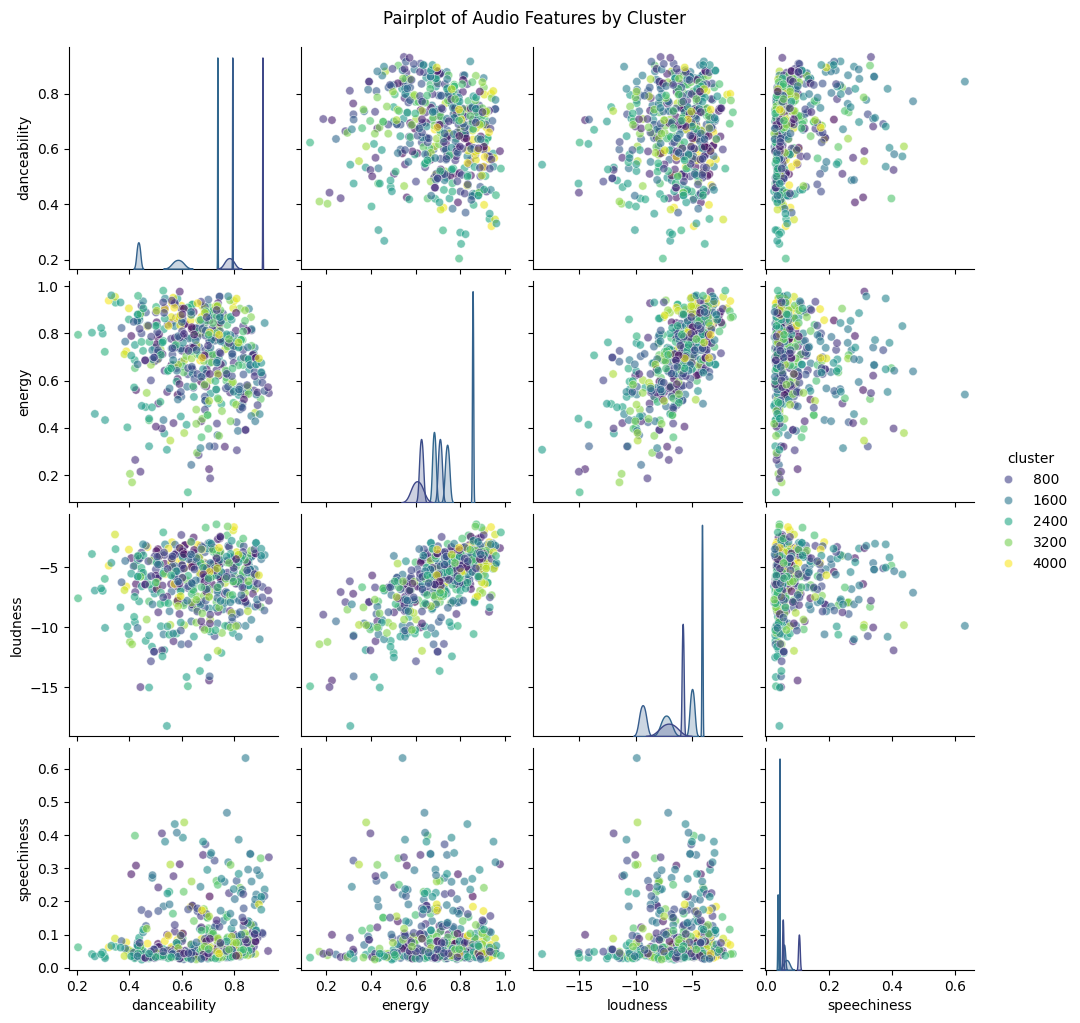

In [22]:
# Pairplot of selected features
sample_df = df[df['cluster'] != -1].sample(500)
sns.pairplot(sample_df[audio_features + ['cluster']], 
             vars=audio_features[:4], 
             hue='cluster', palette='viridis', 
             plot_kws={'alpha': 0.6})
plt.suptitle('Pairplot of Audio Features by Cluster', y=1.02)
plt.show()

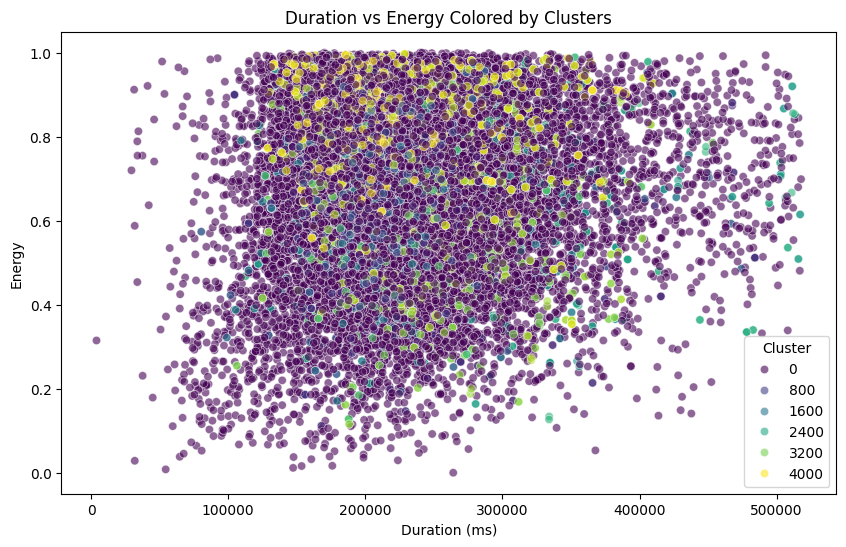

In [23]:
# Duration vs Energy colored by clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='duration_ms', y='energy', 
                hue='cluster', palette='viridis', alpha=0.6)
plt.title('Duration vs Energy Colored by Clusters')
plt.xlabel('Duration (ms)')
plt.ylabel('Energy')
plt.legend(title='Cluster')
plt.show()